<div style="background-color: #611491; border-radius: 20px; color: #fff; font-weight: bold; padding: 10px; text-align:center">
    <h1>Diseño de paletas de colores efectivas para diferentes contextos</h1>
</div>

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Cargar librerías</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys

from pathlib import Path
from PIL import Image
from IPython.display import HTML

actual_dir = Path.cwd()
ruta_outputs = actual_dir.parent / "outputs" / "outputs_dia_1"

ruta_outputs.mkdir(parents=True, exist_ok=True)
print(f"Carpeta creada")

Carpeta creada


<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Creación de dataset de ejemplo para análisis visual</h2>
</div>

In [2]:
# Crear dataset de ejemplo para análisis visual
np.random.seed(42)
df = pd.DataFrame({
    'categoria': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'valor': np.random.normal(50, 15, 100),
    'segmento': np.random.choice(['Alto', 'Medio', 'Bajo'], 100),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 100)
})

print("Dataset para análisis visual:")
print(df.head())
print(f"\nResumen por categoría:")
print(df.groupby('categoria')['valor'].describe())

Dataset para análisis visual:
  categoria      valor segmento region
0         C  61.076999    Medio    Sur
1         D  52.570524     Alto   Este
2         A  48.265276     Alto    Sur
3         C  45.483445    Medio   Este
4         C  27.822170     Alto   Este

Resumen por categoría:
           count       mean        std        min        25%        50%  \
categoria                                                                 
A           20.0  51.702575  10.890634  31.537035  45.350988  49.584364   
B           26.0  50.023838  18.373923  10.703823  36.719278  49.261070   
C           24.0  50.220174  13.684671  20.186466  44.011363  50.766433   
D           30.0  47.158884  12.240452  26.740049  38.205031  47.412212   

                 75%        max  
categoria                        
A          57.147835  73.070548  
B          63.947946  86.948632  
C          58.895928  82.856834  
D          54.297167  78.292789  


<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Diseño de paletas de colores por tipo de dato</h2>
</div>

In [3]:
# Paleta cualitativa para categorías discretas
colores_cualitativos = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, Naranja, Verde, Rojo

# Paleta secuencial para valores continuos
colores_secuenciales = ['#feebe2', '#fbb4b9', '#f768a1', '#c51b8a', '#7a0177']  # De claro a oscuro

# Paleta divergente para valores con punto medio
colores_divergentes = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

print("Paletas de colores diseñadas:")
print(f"Cualitativa: {colores_cualitativos}")
print(f"Secuencial: {colores_secuenciales}")
print(f"Divergente: {colores_divergentes}")

Paletas de colores diseñadas:
Cualitativa: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
Secuencial: ['#feebe2', '#fbb4b9', '#f768a1', '#c51b8a', '#7a0177']
Divergente: ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']


In [4]:
def visualizar_paleta(colores, nombre_de_paleta, size=50):
    '''Crea paleta de colores'''
    
    html = '''<div style="display: flex; gap: 15px; align-items: center;">
              <div style="display: flex;">'''
    
    for i, color in enumerate(colores):
        html += f'''
        <div style="background-color: {color}; 
                    height: {size}px; 
                    width: {size}px;">
        </div>
        '''
    
    html += f'''</div>
                <span style="font-weight: bold;">{nombre_de_paleta}</span>
                </div>'''
    return HTML(html)

display(visualizar_paleta(colores_cualitativos, 'PALETA CUALITATIVA'))
display(visualizar_paleta(colores_secuenciales, 'PALETA SECUENCIAL'))
display(visualizar_paleta(colores_divergentes, 'PALETA DIVERGENTE'))

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Aplicación de principios visuales en gráficos simples</h2>
</div>


Gráfico guardado como 'principios_visuales_ejemplos.png'


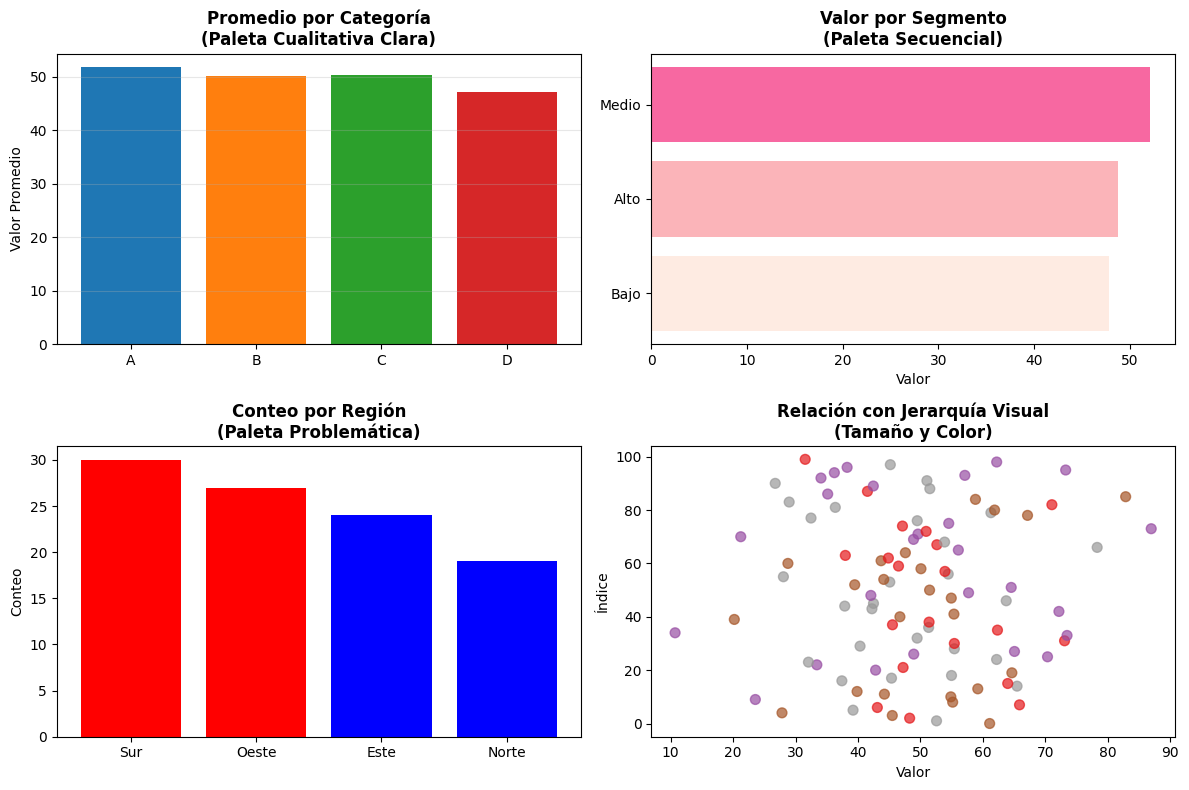

In [5]:
# Gráfico de barras con paleta cualitativa efectiva
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# 1. Gráfico cualitativo (bueno)
categoria_means = df.groupby('categoria')['valor'].mean()
bars1 = ax1.bar(categoria_means.index, categoria_means.values, 
                color=colores_cualitativos[:len(categoria_means)])
ax1.set_title('Promedio por Categoría\n(Paleta Cualitativa Clara)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Valor Promedio')
ax1.grid(axis='y', alpha=0.3)

# 2. Gráfico secuencial (bueno para rangos)
segmento_means = df.groupby('segmento')['valor'].mean().sort_values()
bars2 = ax2.barh(segmento_means.index, segmento_means.values,
                 color=colores_secuenciales[:len(segmento_means)])
ax2.set_title('Valor por Segmento\n(Paleta Secuencial)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Valor')

# 3. Gráfico con colores problemáticos (mal ejemplo)
region_counts = df['region'].value_counts()
bars3 = ax3.bar(region_counts.index, region_counts.values, 
                color=['red', 'red', 'blue', 'blue'])  # Colores similares problemáticos
ax3.set_title('Conteo por Región\n(Paleta Problemática)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Conteo')

# 4. Gráfico con buena jerarquía visual
scatter = ax4.scatter(df['valor'], range(len(df)), 
                     c=df['categoria'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3}),
                     cmap='Set1', alpha=0.7, s=50)
ax4.set_title('Relación con Jerarquía Visual\n(Tamaño y Color)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Valor')
ax4.set_ylabel('Índice')

plt.tight_layout()
plt.savefig(ruta_outputs / 'principios_visuales_ejemplos.png', dpi=100, bbox_inches='tight')
print("\nGráfico guardado como 'principios_visuales_ejemplos.png'")

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Evaluación de accesibilidad de colores</h2>
</div>

In [6]:
# Función simple para verificar contraste básico
def calcular_contraste(color1, color2):
    # Versión simplificada - en producción usar librerías especializadas
    # Contraste mínimo recomendado: 4.5:1
    return "Verificación manual requerida para producción"

print("\nEvaluación de accesibilidad:")
print("- Verificar que textos sean legibles sobre fondos")
print("- Usar herramientas como WebAIM Contrast Checker")
print("- Considerar daltonismo en diseño de paletas")
print("- Probar visualizaciones en escala de grises")


Evaluación de accesibilidad:
- Verificar que textos sean legibles sobre fondos
- Usar herramientas como WebAIM Contrast Checker
- Considerar daltonismo en diseño de paletas
- Probar visualizaciones en escala de grises


<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Análisis de las visualizaciones</h2>
</div>

Compara los gráficos generados y explica cómo los principios visuales (jerarquía, color, composición) afectan la capacidad de comunicar insights claramente.

Primero vamos a escribir una función para obtener los atributos de matiz (tono), luminosidad y saturación para cualquier color en código hexadecimal (con o sin canal alpha) y su conversión a escala de grises.

In [7]:
def obtener_atributos_color_hex(color_hex):
    '''
    Calcula Tono(matiz), Luminosidad y Saturación (HLS) de un color en formato hexadecimal
    (con o sin canal alpha).
    '''
    
    # Convertir HEX a RGBA normalizado (valores de 0.0 a 1.0)
    # to_rgba maneja tanto '#RRGGBB' como '#RRGGBBAA'.
    # Devuelve una tupla de 4 elementos: (r, g, b, a)
    r, g, b, a = mcolors.to_rgba(color_hex)
    
    # Convertir de RGB a HLS (valores de 0.0 a 1.0)
    hue, lightness, saturation = colorsys.rgb_to_hls(r, g, b)

    return round(hue,2), round(lightness,2), round(saturation,2), round(a,2)


def hex_a_gris(color_hex):
    '''
    Convierte un color hexadecimal (con o sin canal alpha) a su equivalente 
    en escala de grises (hexadecimal), utilizando el método de luminosidad perceptiva 
    (ITU-R BT.709) apropiado para Web y Monitores modernos.
    '''
    
    # Convertir HEX a RGB normalizado (valores de 0.0 a 1.0)
    r, g, b, a = mcolors.to_rgba(color_hex)
    
    # Calcular la luminosidad (el valor del gris) usando la fórmula ponderada estándar:
    # Ojo humano percibe más el verde, luego el rojo y finalmente el azul.
    luminosidad = (0.2126 * r + 0.7152 * g + 0.0722 * b)
    
    # Crear el color gris. En RGB, un gris tiene R=G=B=luminosidad
    gris_rgb_norm = (luminosidad, luminosidad, luminosidad, a)
    
    # Convertir de RGB nornalizado a HEX
    gris_hex = mcolors.to_hex(gris_rgb_norm, keep_alpha=True)
    
    return gris_hex

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">Análisis gráfico: Promedio por Categoría</h3>
</div>

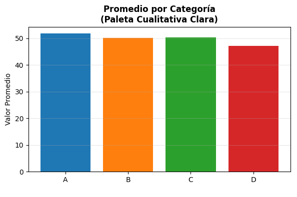

In [8]:
img = Image.open(ruta_outputs / 'principios_visuales_ejemplos.png')
width, height = img.size

img_ax1 = img.crop((0, 0, width//2, height//2))
img_ax1 = img_ax1.resize((img_ax1.width // 2, img_ax1.height // 2))
display(img_ax1)

In [9]:
colores_cualitativos_escala_grises = [hex_a_gris(color) for color in colores_cualitativos]

display(visualizar_paleta(colores_cualitativos, 'COLORES CUALITATIVOS'))

print('\nAtributos de Paleta de Colores Cualitativos (de izquierda a derecha):')
for color in colores_cualitativos:
    hue, light, sat, a = obtener_atributos_color_hex(color)
    print(f"  - Color {color}: hue={hue}, lightness={light}, saturation={sat}, alpha={a}")

print('\n\n')
display(visualizar_paleta(colores_cualitativos_escala_grises, 'COLORES CUALITATIVOS EN ESCALA DE GRISES'))

print('\nAtributos de Paleta de Colores Cualitativos en escala de grises (de izquierda a derecha):')
for color in colores_cualitativos_escala_grises:
    hue, light, sat, a = obtener_atributos_color_hex(color)
    print(f"  - Color {color}: hue={hue}, lightness={light}, saturation={sat}, alpha={a}")


Atributos de Paleta de Colores Cualitativos (de izquierda a derecha):
  - Color #1f77b4: hue=0.57, lightness=0.41, saturation=0.71, alpha=1.0
  - Color #ff7f0e: hue=0.08, lightness=0.53, saturation=1.0, alpha=1.0
  - Color #2ca02c: hue=0.33, lightness=0.4, saturation=0.57, alpha=1.0
  - Color #d62728: hue=1.0, lightness=0.5, saturation=0.69, alpha=1.0






Atributos de Paleta de Colores Cualitativos en escala de grises (de izquierda a derecha):
  - Color #696969ff: hue=0.0, lightness=0.41, saturation=0.0, alpha=1.0
  - Color #929292ff: hue=0.0, lightness=0.57, saturation=0.0, alpha=1.0
  - Color #7f7f7fff: hue=0.0, lightness=0.5, saturation=0.0, alpha=1.0
  - Color #4c4c4cff: hue=0.0, lightness=0.3, saturation=0.0, alpha=1.0


**Análisis de paleta en colores:**

- Se grafica una variable categórica nominal (categoria) por lo que es adecuado usar una paleta cualitativa.
- El color naranja es el más saturado (1.0), con luminosidad media (0.53) y un matiz intrínsecamente llamativo que lo hace destacar sobre los demás. Si todas las categorías son igualmente importantes, debería reducirse su saturación a ~0.7 para mantener consistencia visual.
- La luminosidad de todos los colores es similar (0.4-0.5), lo que crea balance visual y sugiere importancia equivalente entre categorías. Sin embargo, la saturación varía considerablemente: el naranja (1.0) rompe la uniformidad respecto al verde (0.57), azul (0.71) y rojo (0.69).
- Un daltónico tendría problemas distinguiendo el rojo (hue=1.0, lightness=0.5) del verde (hue=0.33, lightness=0.4) porque su diferencia de luminosidad es insuficiente (0.1). Para mejorar la accesibilidad, el verde debería ser más claro (lightness ~0.6-0.7) y el rojo más oscuro (lightness ~0.3), creando contraste perceptible independiente del matiz.

**Análisis de paleta en escala de grises:**

- En escala de grises, solo importa la luminosidad.
- Los colores naranja y verde tienen solo 0.07 de diferencia de luminosidad, insuficiente para distinción clara en pantalla y especialmente problemático en impresión, donde los colores se oscurecen y el contraste se reduce (mínimo recomendado: 0.15-0.20).
- Para daltónicos: La escala de grises es mejor que el color original porque elimina la confusión rojo-verde por matiz. El rojo (0.30) y verde (0.50) ahora tienen diferencia suficiente (0.20).

**Recomendación:**  

- Aumentar la separación de luminosidad entre todos los colores a mínimo 0.15-0.20 en la paleta original para garantizar distinción clara tanto en color como en escala de grises, considerando que en impresión estos valores se oscurecerán y el contraste se reducirá aún más.

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">Análisis gráfico: Valor por Segmento</h3>
</div>

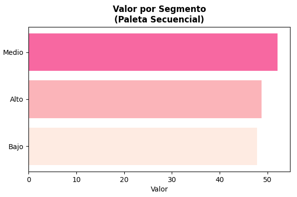

In [10]:
img_ax2 = img.crop((width//2, 0, width, height//2))
img_ax2 = img_ax2.resize((img_ax2.width // 2, img_ax2.height // 2))
display(img_ax2)

In [11]:
colores_secuenciales_escala_grises = [hex_a_gris(color) for color in colores_secuenciales[:df.segmento.nunique()]]

display(visualizar_paleta(colores_secuenciales[:df.segmento.nunique()], 'COLORES SECUENCIALES'))

print('\nAtributos de Paleta de Colores Secuenciales (de izquierda a derecha):')
for color in colores_secuenciales[:df.segmento.nunique()]:
    hue, light, sat, a = obtener_atributos_color_hex(color)
    print(f"  - Color {color}: hue={hue}, lightness={light}, saturation={sat}, alpha={a}")

print('\n\n')
display(visualizar_paleta(colores_secuenciales_escala_grises, 'COLORES SECUENCIALES EN ESCALA DE GRISES'))

print('\nAtributos de Paleta de Colores Secuenciales en escala de grises (de izquierda a derecha):')
for color in colores_secuenciales_escala_grises:
    hue, light, sat, a = obtener_atributos_color_hex(color)
    print(f"  - Color {color}: hue={hue}, lightness={light}, saturation={sat}, alpha={a}")


Atributos de Paleta de Colores Secuenciales (de izquierda a derecha):
  - Color #feebe2: hue=0.05, lightness=0.94, saturation=0.93, alpha=1.0
  - Color #fbb4b9: hue=0.99, lightness=0.85, saturation=0.9, alpha=1.0
  - Color #f768a1: hue=0.93, lightness=0.69, saturation=0.9, alpha=1.0






Atributos de Paleta de Colores Secuenciales en escala de grises (de izquierda a derecha):
  - Color #eeeeeeff: hue=0.0, lightness=0.93, saturation=0.0, alpha=1.0
  - Color #c3c3c3ff: hue=0.0, lightness=0.76, saturation=0.0, alpha=1.0
  - Color #8b8b8bff: hue=0.0, lightness=0.55, saturation=0.0, alpha=1.0


**Análisis de paleta en colores:**

- Se grafica una variable categórica ordinal (segmento) ordenada por valor medio creciente (.sort_values()), por lo que es adecuado usar una paleta secuencial con colores progresivamente más oscuros para indicar segmentos de menor a mayor valor promedio.
- La luminosidad excesivamente alta del color más claro (0.94), correspondiente al segmento  bajo, dificulta su visualización, especialmente en pantallas brillantes o impresiones. Se recomienda reducirla a ~0.80-0.85 para mantener legibilidad sin perder la progresión visual.
- Hay un contraste insuficiente en los colores de los segmentos Bajo y Medio: la diferencia de luminosidad (0.09) está por debajo del mínimo recomendado (0.15), lo que puede dificultar la distinción entre estos dos segmentos.
- Para daltónicos: No hay problema. Los tres colores comparten el mismo matiz (rosado/rojo, hue ~0.93-0.05) y se diferencian únicamente por luminosidad (0.94 → 0.85 → 0.69). Como los daltónicos distinguen perfectamente variaciones de luminosidad, esta paleta es accesible (aunque aún persiste el problema de la alta luminosidad del color más claro).

**Análisis de paleta en escala de grises:**

- Aunque las diferencias de luminosidad superan el mínimo recomendado (0.15), el color del segmento bajo (0.93) es excesivamente claro, dificultando su visualización en impresiones y pantallas brillantes, comprometiendo la accesibilidad general.
- Para daltónicos: No hay problema para distinguir los tres tonos debido a las diferencias de luminosidad suficientes. La única dificultad es la excesiva luminosidad del color más claro, que afecta a todos los usuarios por igual.

**Recomendación:** 

- Reducir la luminosidad del tono más claro a ~0.80-0.85, asegurando diferencias mínimas de 0.15-0.20 entre todos los pares consecutivos de la paleta original para mantener progresión visual clara y legibilidad óptima tanto en pantalla como en impresión.

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">Análisis gráfico: Conteo por Región</h3>
</div>

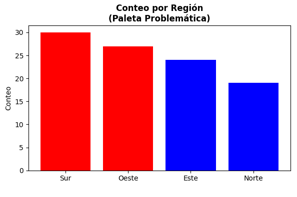

In [12]:
img_ax3 = img.crop((0, height//2, width//2, height))
img_ax3 = img_ax3.resize((img_ax3.width // 2, img_ax3.height // 2))
display(img_ax3)

In [13]:
dos_colores = ['#FF0000', '#0000FF']
dos_colores_escala_grises = [hex_a_gris(color) for color in dos_colores]

display(visualizar_paleta(dos_colores, 'PALETA DE DOS COLORES'))

print('\nAtributos de Paleta de Dos Colores (de izquierda a derecha):')
for color in dos_colores:
    hue, light, sat, a = obtener_atributos_color_hex(color)
    print(f"  - Color {color}: hue={hue}, lightness={light}, saturation={sat}, alpha={a}")

print('\n\n')
display(visualizar_paleta(dos_colores_escala_grises, 'PALETA DE DOS COLORES EN ESCALA DE GRISES'))

print('\nAtributos de Paleta de Dos Colores en escala de grises (de izquierda a derecha):')
for color in dos_colores_escala_grises:
    hue, light, sat, a = obtener_atributos_color_hex(color)
    print(f"  - Color {color}: hue={hue}, lightness={light}, saturation={sat}, alpha={a}")


Atributos de Paleta de Dos Colores (de izquierda a derecha):
  - Color #FF0000: hue=0.0, lightness=0.5, saturation=1.0, alpha=1.0
  - Color #0000FF: hue=0.67, lightness=0.5, saturation=1.0, alpha=1.0






Atributos de Paleta de Dos Colores en escala de grises (de izquierda a derecha):
  - Color #363636ff: hue=0.0, lightness=0.21, saturation=0.0, alpha=1.0
  - Color #121212ff: hue=0.0, lightness=0.07, saturation=0.0, alpha=1.0


**Análisis de paleta en colores:**

- Paleta incorrecta: Aunque .value_counts() establece un ranking por frecuencia ordenado de mayor a menor conteo, se usa una paleta de dos colores (rojo, azul) en lugar de una paleta secuencial. Esto viola el principio de Gestalt de semejanza: el cerebro automáticamente agrupa las regiones en dos clases (rojas vs azules), sugiriendo una distinción categórica que contradice la naturaleza cuantitativa del ranking.
- Ambos colores tienen idéntica luminosidad (0.5) y saturación (1.0), lo que crea equilibrio visual y sugiere importancia equivalente entre las dos clases, lo cual refuerza la inadecuada elección de paleta en este caso.
- Rojo y azul son matices completamente opuestos en el espectro, fácilmente distinguibles por la mayoría de usuarios incluyendo daltónicos.

**Análisis de paleta en escala de grises:**

- Ambos colores, con luminosidades de 0.21 y 0.07, se verán como tonos de gris muy oscuros, casi indistinguibles del negro, especialmente en impresión, donde los colores se oscurecen aún más. La diferencia de luminosidad de 0.14 está por debajo del mínimo recomendado (0.15-0.20), lo que dificulta su distinción visual tanto en escala de grises como en medios impresos.
- El bajo contraste (0.14) afecta a todos los usuarios por igual, incluyendo los daltónicos.

**Recomendación:**  

- Usar una paleta secuencial: Como existe un ranking implícito por conteo, se requiere una paleta secuencial (oscuro a claro) para comunicar visualmente la progresión de mayor a menor frecuencia.

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">Análisis gráfico: Relación con Jerarquía Visual</h3>
</div>

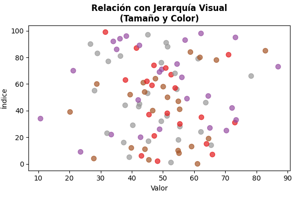

In [14]:
img_ax4 = img.crop((width//2, height//2, width, height))
img_ax4 = img_ax4.resize((img_ax4.width // 2, img_ax4.height // 2))
display(img_ax4)

In [15]:
paleta_Set1 = plt.get_cmap('Set1').colors
paleta_Set1 = [paleta_Set1[c] for c in [0, 3, 6, 8]] 
paleta_Set1 = [mcolors.to_hex(color) for color in paleta_Set1]

# Convertir un valor flotante de transparencia (0.0 a 1.0) a su representación hexadecimal
alpha_float_a_hex = lambda alpha_float: f"{round(alpha_float * 255):02X}"
alpha_punto_7 = alpha_float_a_hex(0.7)

paleta_Set1 = [mcolors.to_hex(color) + alpha_punto_7 for color in paleta_Set1]

display(visualizar_paleta(paleta_Set1, 'PALETA SET1'))

print('\nAtributos de Paleta de Colores Set1 (de izquierda a derecha):')
for color in paleta_Set1:
    hue, light, sat, a = obtener_atributos_color_hex(color)
    print(f"  - Color {color}: hue={hue}, lightness={light}, saturation={sat}, alpha={a}")

print('\n\n')

paleta_Set1_escala_grises = [hex_a_gris(color) for color in paleta_Set1]

display(visualizar_paleta(paleta_Set1_escala_grises, 'PALETA SET1 EN ESCALA DE GRISES'))

print('\nAtributos de Paleta de Colores Set1s en escala de grises (de izquierda a derecha):')
for color in paleta_Set1_escala_grises:
    hue, light, sat, a = obtener_atributos_color_hex(color)
    print(f"  - Color {color}: hue={hue}, lightness={light}, saturation={sat}, alpha={a}")


Atributos de Paleta de Colores Set1 (de izquierda a derecha):
  - Color #e41a1cB2: hue=1.0, lightness=0.5, saturation=0.8, alpha=0.7
  - Color #984ea3B2: hue=0.81, lightness=0.47, saturation=0.35, alpha=0.7
  - Color #a65628B2: hue=0.06, lightness=0.4, saturation=0.61, alpha=0.7
  - Color #999999B2: hue=0.0, lightness=0.6, saturation=0.0, alpha=0.7






Atributos de Paleta de Colores Set1s en escala de grises (de izquierda a derecha):
  - Color #454545b2: hue=0.0, lightness=0.27, saturation=0.0, alpha=0.7
  - Color #646464b2: hue=0.0, lightness=0.39, saturation=0.0, alpha=0.7
  - Color #646464b2: hue=0.0, lightness=0.39, saturation=0.0, alpha=0.7
  - Color #999999b2: hue=0.0, lightness=0.6, saturation=0.0, alpha=0.7


**Nota sobre transparencia:** La transparencia (alpha=0.7) hace que todos los colores se mezclen con el fondo blanco, percibiéndose más claros y menos saturados. Los valores HLS reportados son del color base; el efecto visual real será más suave.

**Análisis de paleta en colores:**

- Hay una jerarquía visual no intencional: El rojo destaca significativamente por tener la mayor saturación (0.8) y ser un tono cálido intrínsecamente llamativo (hue=1.0). Le sigue el café también tono cálido (hue=0.06) con saturación alta (0.61). El morado es menos llamativo por su saturación baja (0.35) y tono frío (hue=0.81). Finalmente, el gris es el menos distintivo por estar completamente desaturado (0.0) y carecer de matiz, aunque su luminosidad media-alta (0.6) lo hace más claro que los demás.
- Para daltónicos: El rojo (hue=1.0) y el café (hue=0.06) tienen matices muy cercanos en el espectro circular. Aunque la diferencia de luminosidad (0.10) ayuda levemente, estos usuarios tendrán dificultad distinguiéndolos, especialmente con alpha=0.7 que reduce el contraste general.

**Análisis de paleta en escala de grises:**

- El morado y el café en escala de grises son indistinguibles: Ambos tienen prácticamente la misma luminosidad(0.39) en el color base. Con alpha=0.7 sobre fondo blanco, ambos se percibirán con luminosidad ~0.61, haciéndolos imposibles de diferenciar en escala de grises, impresión o para cualquier usuario.
- Todas las diferencias de luminosidad entre colores están por debajo del mínimo recomendado (0.15-0.20) y con alpha=0.7 se aclaran los colores y se reduce el contraste percibido entre ellos, agravando los problemas de distinción. En impresión, donde los colores se oscurecen, el problema morado-café persiste ya que ambos seguirán siendo idénticos.
- Para daltónicos: La escala de grises elimina la confusión rojo-café por matiz (problema que existía en color), pero introduce un problema nuevo y crítico: la indistinguibilidad total entre morado y café.


**Recomendación:**

- Eliminar la transparencia (alpha=1.0):
    - La transparencia (alpha=0.7) complica el diseño al suavizar colores y reducir contrastes, requiriendo compensaciones adicionales en luminosidad
    - Con alpha=1.0, los colores se perciben exactamente como se diseñan, facilitando el control preciso de diferencias de luminosidad y el cumplimiento del mínimo recomendado (0.20 entre pares)
    - Simplifica la verificación de accesibilidad tanto en pantalla como en impresión
- Reducir tamaño de puntos:
    - Con colores saturados (~0.6-0.7) y luminosidad media (0.45-0.55), los puntos son naturalmente visibles
    - Reducir de s=50 a s=30-35 mejora la legibilidad al reducir superposición visual y hace el gráfico menos saturado visualmente
- Paleta cualitativa optimizada:
    - Luminosidades bien separadas: Mínimo 0.20 entre cualquier par de colores para garantizar distinción clara en escala de grises e impresión
    - Saturación consistente: ~0.6-0.7 para todas las categorías, evitando jerarquías visuales no intencionales
    - Matices bien diferenciados: Evitar combinaciones problemáticas para daltónicos (rojo-verde, rojo-café)
    - Ejemplo de distribución de luminosidades: 0.35, 0.55, 0.75, 0.95 (diferencias de 0.20, máxima separación)
- Verificación obligatoria:
    - Simular conversión a escala de grises antes de finalizar
    - Confirmar que cada categoría tiene luminosidad única con diferencias ≥0.20
    - Probar con simuladores de daltonismo, de ser posible.

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">Análisis de Composición Visual del Dashboard</h3>
</div>

---
**Jerarquía Visual**

**Tipografía:**
- Consistencia efectiva: Todos los gráficos usan fontsize=12, fontweight='bold' para títulos, creando uniformidad y jerarquía clara
- Títulos descriptivos: Incluyen contexto entre paréntesis que ayuda a comprender el propósito pedagógico de cada gráfico
- Etiquetas de ejes claras: set_ylabel() y set_xlabel() proporcionan contexto sin competir visualmente con los títulos

**Tamaño y proporción:**
- Dimensiones balanceadas: figsize=(12, 8) en layout 2x2 da ~6x4 por gráfico, proporción adecuada
- Barras bien dimensionadas: Ancho automático de matplotlib llena apropiadamente el espacio
- Tamaño de puntos: s=50 con alpha=0.7 es visible pero podría reducirse a 30-35 para reducir saturación visual

**Posición:**
- Layout 2x2 sigue patrón Z: Los gráficos se leen naturalmente: arriba-izq (cualitativa) → arriba-der (secuencial) → abajo-izq (problemática) → abajo-der (jerarquía)

---

**Flujo de Lectura**

**Patrón de lectura:**
- Patrón Z respetado: El layout 2x2 facilita la lectura natural izquierda-derecha, arriba-abajo

**Diseño intencional:**
- Propósito pedagógico claro: Cada gráfico demuestra un concepto específico (paletas cualitativas, secuenciales, problemáticas, jerarquía visual)
- Contraste conceptual: Colocar el ejemplo "Problemático" (ax3) permite comparación directa con los buenos ejemplos

---

**Equilibrio y Espacios en Blanco**

**Fondo y contraste:**
- Fondo blanco apropiado: Fundamental para que la percepción de matiz, luminosidad y saturación se corresponda con los valores HLS analizados. Un fondo de color alteraría significativamente la percepción cromática por contraste simultáneo
- Facilita procesamiento cognitivo: El fondo neutro permite que los datos sean la figura principal sin competencia visual

**Espaciado:**
- plt.tight_layout() optimiza espacios: Ajusta automáticamente padding entre subplots para evitar superposición de títulos/etiquetas
- Márgenes apropiados: bbox_inches='tight' al guardar elimina espacios en blanco innecesarios en los bordes del archivo

**Alineación:**
- Grid consistente 2x2: Matplotlib alinea automáticamente los bordes de los ejes, creando estructura visual ordenada
- Mezcla de orientaciones: ax1 y ax3 son barras verticales, ax2 es barras horizontales, ax4 es scatter. Esto crea variedad visual pero puede romper ligeramente la uniformidad

---

**Minimización de Ruido Visual**

**Elementos necesarios vs innecesarios:**
- Grid sutil en ax1: grid(axis='y', alpha=0.3) ayuda a leer valores sin dominar visualmente
- Grid inconsistente: Solo ax1 tiene grid. Para consistencia, todos deberían tenerlo o ninguno (o al menos ax1 y ax3 que son verticales similares)

**Consistencia:**
- Estilos uniformes: Mismo formato de títulos, fuentes y colores de ejes en todos los gráficos
- Tipos de gráfico variados: Bar vertical (ax1, ax3), bar horizontal (ax2), scatter (ax4). Esto es apropiado para demostrar versatilidad, pero reduce uniformidad visual

**Elementos faltantes críticos:**
- Leyenda ausente en ax4: El scatter plot de "Jerarquía Visual" NO tiene leyenda. Sin ella, es imposible saber qué color corresponde a cada categoría (A, B, C, D). Esto invalida completamente el propósito del gráfico y hace que el análisis de color sea ininterpretable para el lector.
- Falta un título general unificador, como por ejemplo: *Principios de Teoría del Color en Visualización de Datos*, con fontsize=14 y fontweight='bold' para consistencia.

**Legibilidad:**
- Fuentes legibles: Tamaño 12 para títulos es apropiado para figsize=(12, 8)
- Contraste texto-fondo: Texto negro sobre fondo blanco garantiza máxima legibilidad 
- Sin superposición: tight_layout() previene que títulos/etiquetas se superpongan

**Elementos Específicos por Gráfico**
- ax1 (Cualitativa):
    - Grid ayuda a lectura de valores
    - Barras verticales apropiadas para categorías nominales
- ax2 (Secuencial):
    - Barras horizontales efectivas para mostrar progresión ordenada
    - .sort_values() hace que la paleta secuencial sea coherente con el ordenamiento visual
    - Falta grid para consistencia con ax1
- ax3 (Problemática):
    - Ejemplo deliberadamente malo demuestra el concepto
    - No hay ordenamiento (.value_counts() ordena por frecuencia descendente automáticamente, pero visualmente no se percibe claramente)
    - Falta grid
- ax4 (Jerarquía Visual):
    - Crítico: Falta leyenda
    - El título menciona "Tamaño y Color" pero todos los puntos tienen el mismo tamaño (s=50), lo que puede confundir. El título debería ser "Jerarquía Visual (Color y Transparencia)" o variar el tamaño por categoría para demostrar ese principio
